# Fingerprint Authentication Using Python

In this lab activity, you will obtain a slight intuition on how biometrics systems work in order to validate a person's fingerprint by using Python. Although this may seem far from "Systems Programming", it is important to recognise all the work that has to be developed in order to implement this type authentication.

# Importing the Necessary Modules

To do this activity, you need to have the following python modules installed in your computer:

* numpy
* matplotlib
* scikit image
* opencv-python

Remember that you can use the command "!pip install ..." to install these modules

In [4]:
# Use this cell to install the necessary modules
!pip install --user opencv-python

Now, import the installed modules

In [16]:
import numpy as np
from matplotlib import pyplot as plt
import skimage as si
import cv2

# Importing and Preprocessing an Image

In moodle there are four images of fingerprints: Two for subject 101 (101_1.tif and 101_2.tif) and two for subject 102 (102_1.tif and 102_2.tif). The first step to create a fingerprint authentication system is to **Register** the users into the database. To do so, we will do the following:
* Load and "binarise" the image of the fingerprint.
* Skeletonise the binarised image.
* Extract the corner points of the fingerprint ridges.
* Extract the SIFT features of the corners.

## Loading and binarising the image

First, save the fingerprint images (in moodle) within the same folder as this notebook. You will use the command "cv2.imread" to import the image. This command takes two arguments: the name of the image, and the flag that indicates what type of image to load: 0 for grayscale and 1 for RGB. Usually, biometric images are treated in grayscale. Therefore, we will use the following setting:

* img = cv2.imread(**FULL NAME OF THE IMAGE INSIDE QUOTATION MARKS**, 0)

In [8]:
## Use this cell to write the code that will load a fingerprint image
img = cv2.imread("101_1.tif", 0)

Now the image has been imported to Python and has become a numpy array. If you request the variable "img", you will notice that the system will output an array instead of the image.

In [9]:
img

array([[254, 254, 254, ..., 254, 254, 254],
       [254, 254, 254, ..., 254, 254, 254],
       [254, 254, 254, ..., 254, 254, 254],
       ...,
       [254, 254, 254, ..., 254, 254, 254],
       [254, 254, 254, ..., 254, 254, 254],
       [254, 254, 254, ..., 254, 254, 254]], dtype=uint8)

Moreover, you can verify the size of the array by using the "shape" command.

In [23]:
img.shape

(372, 245)

In case you want to see the array as an image, you can use the command 

* plt.imshow(img) 

followed by 

* plt.show()

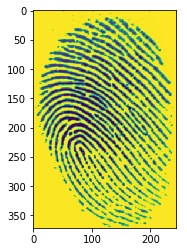

In [22]:
plt.imshow(img)
plt.show()

The image has been imported as an array of values that range from 0 (black) to 255 (white). In between, there are multiple shades of gray that may represent noisy pixels. Therefore, a cleaning process called "binarisation" is applied to the image in order to get rid of tis noise and to enhance the shape of the fingerprint. To do so, use the "cv2.threshold" command:

* _, img_bin = cv2.threshold(img, 127, 255, 0)

The argumants of the function indicate that all pixels with a value higher than 127 will become 255, and that pixels with a value smaller than 127 will become 0.

In [27]:
## Use this cell to write the code that will binarise the fingerprint image
ret, img_bin = cv2.threshold(img, 127, 255, 0)

Now you can see that the array only includes values 0 and 255.

In [28]:
img_bin

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

Moreover, we can take a look at "img_bin" to see how the binarisation afects the image

In [29]:
img_bin.shape

(372, 245)

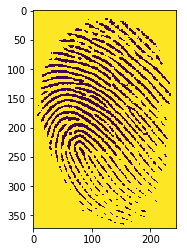

In [30]:
plt.imshow(img_bin)
plt.show()

## Skeletonisation

Now that the image has been binarised, we can apply a filter so that the ridges are thinned and it becomes easier to find the features. To do so, import the "skeletonize" module contained in scikit image morphoology package (skimage.morphology):

* from skimage.morphology import skeletonize

Then we convert the 255 into 1 (since the skeletonisation method works only if the matrix contains ones and zeroes):

* img_bin[img_bin == 255] = 1

And finally we apply the skeletonisation filter and create a new image called "img_skeleton":

* img_skeleton = np.asarray(skeletonize(img_bin), dtype=np.uint8)

In [32]:
## Use this cell to write the code that will skeletonise the binarised fingerprint image
from skimage.morphology import skeletonize
img_bin[img_bin == 255] = 1
img_skeleton = np.asarray(skeletonize(img_bin), dtype=np.uint8)

Once again we can visualise the image:

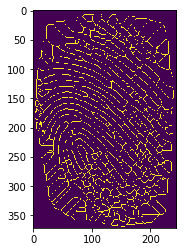

In [33]:
plt.imshow(img_skeleton)
plt.show()

## Findig the features

To find the feature points that describe the fingerprint, we will use two popular methods in image recognition: The first one is called Harris corners (which will transform the image into a Harris corner image with indexes describing how likely a pixel is to be a corner) and the second is Scale Invariant Feature Transform (SIFT), which will extract a vector of descriptor for each of the candidate corners.

### Harris corners

To generate the Harris corners image, type the following commands:

harris_corners = cv2.cornerHarris(img_skeleton, 3, 3, 0.04)
harris_corners_normalized = cv2.normalize(harris_corners, 0, 255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32FC1)

In [36]:
## Use this cell to write the code that will generate the normalised harris corners from the skeletonised image
harris_corners = cv2.cornerHarris(img_skeleton, 3, 3, 0.04) 
harris_corners_norm = cv2.normalize(harris_corners, 0, 255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32FC1)

In [37]:
harris_corners_norm

array([[43.802277, 43.802277, 43.802277, ..., 43.802277, 43.802277,
        43.802277],
       [43.802277, 43.802277, 43.802277, ..., 43.802277, 43.802277,
        43.802277],
       [43.802277, 43.802277, 43.802277, ..., 43.802277, 43.802277,
        43.802277],
       ...,
       [43.802277, 43.802277, 43.802277, ..., 43.802277, 43.802277,
        43.802277],
       [43.802277, 43.802277, 43.802277, ..., 43.802277, 43.802277,
        43.802277],
       [43.802277, 43.802277, 43.802277, ..., 43.802277, 43.802277,
        43.802277]], dtype=float32)

Notice that if we inspect the Harris corners image we will notice that the corners are represented in lighter colours, having a larger value than pixels which are less likely to be corners.

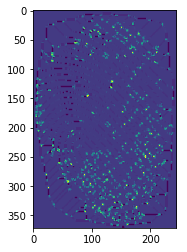

In [38]:
plt.imshow(harris_corners_norm)
plt.show()

### SIFT descriptors

To find the descriptors for each corner, first we need to establish a **threshold value**. This means that if a pixel in the Harris corners image has a value larger than the threshold, then it is considered a true corner. We will set this threshold empirically as 125. Then, we will scan the image for all rows and columns to find and extract the keypoints. Finally, we will extract the SIFT descriptors of each keypoint by using the orb.create and the orb.compute functions:

In [39]:
threshold_harris = 125
keys_101_1 = []
for x in range(0, harris_corners_norm.shape[0]):
    for y in range(0, harris_corners_norm.shape[1]):
        if harris_corners_norm[x][y] > threshold_harris:
            keys_101_1.append(cv2.KeyPoint(y, x, 1))
orb = cv2.ORB_create()
_, desc_101_1 = orb.compute(img, keys_101_1)

You can see the variable "des" to inspect the features

In [40]:
desc_101_1

array([[ 75, 211,  81, ..., 178, 170, 189],
       [ 75, 209,  80, ..., 182, 170, 157],
       [  9, 122, 179, ...,  95,   3, 203],
       ...,
       [ 93,  29,  23, ...,  99,  35, 202],
       [ 20, 159,  23, ..., 101,  35,  98],
       [148, 171, 183, ..., 101,  39,  98]], dtype=uint8)

"desc_101_1" should be a numpy array with 1215 rows (each representing one true harris corner point) and 32 columns (each representing a feature). If you are interested to know more about what each of these 32 features represents, you can read the wiki entry for SIFT here:

https://en.wikipedia.org/wiki/Scale-invariant_feature_transform

In [41]:
desc_101_1.shape

(1215, 32)

## Enrolling the Remaining Images

Now that the keypoints and descriptors for image 101_1.tif are stored in variables keys_101_1 and desc_101_1 respectively, you can create a function called "enroll" which you can simply call as many times as you need to enroll the remaining images.

In [42]:
## Use this cell to write a function that by being called three times, enrolls the images
def enroll(image_name):
    '''This function takes the name of the image as input and outputs the keypoints and descriptors.'''
    # Step 1: Load the fingerprint image (1 line of code).
    img = cv2.imread(image_name, 0)
    # Step 2: Binarise the loaded image (1 line of code).
    _, img_bin = cv2.threshold(img, 127, 255, 0)
    # Step 3: Skeletonise the binarised image (2 lines of code).
    img_bin[img_bin == 255] = 1
    img_skeleton = np.asarray(skeletonize(img_bin), dtype=np.uint8)
    # Step 4: Generate the normalised harris corners image from the skeletonised image (2 lines of code).
    harris_corners = cv2.cornerHarris(img_skeleton, 3, 3, 0.04)
    harris_corners_norm = cv2.normalize(harris_corners, 0, 255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32FC1)
    # Step 5: Extract the SIFT features of the true harris corners with a threshold of 125 (8 lines of code).
    threshold_harris = 125
    keys = []
    for x in range(0, harris_corners_norm.shape[0]):
        for y in range(0, harris_corners_norm.shape[1]):
            if harris_corners_norm[x][y] > threshold_harris:
                keys.append(cv2.KeyPoint(y, x, 1))
    orb = cv2.ORB_create()
    _, desc = orb.compute(img, keys)
    return keys, desc

# Call the function three times
keys_101_2, desc_101_2 = enroll('101_2.tif')
keys_102_1, desc_102_1 = enroll('102_1.tif')
keys_102_2, desc_102_2 = enroll('102_2.tif')

## Matching Fingerprints

Now that we have all keypoints and descriptors for each fingerprint, we implement a brute force matching method that will attempt to find the best mapping between a pair of fingerprints.

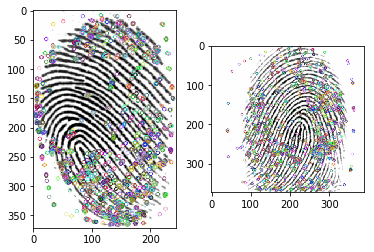

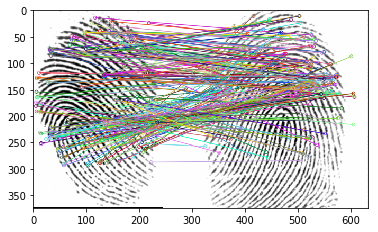

In [45]:
def enroll_match(image_nameA, image_nameB):
    keysA, descA = enroll(image_nameA)
    keysB, descB = enroll(image_nameB)
    imgA = cv2.imread(image_nameA, 1)
    imgB = cv2.imread(image_nameB, 1)
    bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    match = sorted(bf.match(descA, descB), key= lambda match:match.distance)
    # Plot keypoints
    imgA_keys = cv2.drawKeypoints(imgA, keysA, outImage=None)
    imgB_keys = cv2.drawKeypoints(imgB, keysB, outImage=None)
    f, axarr = plt.subplots(1,2)
    axarr[0].imshow(imgA_keys)
    axarr[1].imshow(imgB_keys)
    plt.show()
    # Plot matches
    
    ## with this code you only plot the matches that are potentially true
    plot_match = []
    for ma in match:
        if ma.distance < 73:
            plot_match.append(ma)
    
    img_match = cv2.drawMatches(imgA, keysA, imgB, keysB, plot_match, flags=2, outImg=None)
    plt.imshow(img_match)
    plt.show()
    return match

# Call the function
match = enroll_match('101_1.tif', '102_2.tif')

## Evaluate the "goodness" of the match

As commented before, the key of biometrics is that you can never guarantee an exact match (unless you are comparing the same two images), but rather you are matching two images and declaring if they belong to the same subject or not based on a score threshold. This score is calculated based on the distance between one matched feature and the other. Moreover, the score threshold is set empirically based on previous experiments

For this example, we will set the acceptance threshold equal to 73. This means that if the matching obtains a score of 73 or lower, then the two fingerprints are of the same person, and if the value is higher, then the fingerprints don't match.

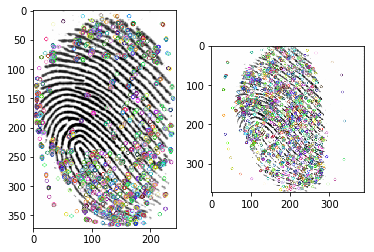

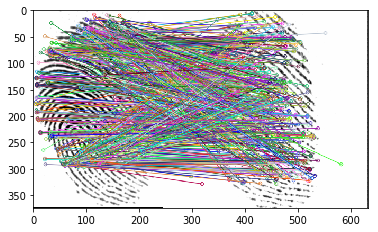

Score is 52.919402985074626
Fingerprint matches.


In [44]:
def score(match):
    score = 0
    score_threshold = 73
    for ma in match:
        score += ma.distance
    score = score/len(match)
    print('Score is', score)
    if score < score_threshold:
        print("Fingerprint matches.")
    else:
        print("Fingerprint does not match.")
    return

## With this code you can run all functions at once
match = enroll_match('101_1.tif', '101_2.tif')
score(match)